## Findings

1. Capomulin is the one drug out of the four that appears to have reduced the size of tumors over forty-five days.
2. Capomulin has the overall highest survival rate by a significant margin.
3. Capomulin has the lowest rate of metastatic spread.

In [4]:
# Dependencies and setup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load file, read mouse/drug and clinical trial data and load into data frmaes
clinicaltrial_data = pd.read_csv("data/clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")

# Combine the data into a single dataset
# Display the data table for preview
combined = pd.merge(clinicaltrial_data, mouse_drug_data, on='Mouse ID')

In [5]:
combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor response to treatment

In [6]:
# Store the mean tumor volume data grouped by drug and timepoint 
# Store the standard error of tumor volumes grouped by drug and timepoint
# Convert to dataframe and preview
# Munge data to reformat dataframes
response_drug_timepoint = combined.groupby(['Drug', 'Timepoint'])
avg_tumor_volume = response_drug_timepoint['Tumor Volume (mm3)'].mean()
standard_error = response_drug_timepoint['Tumor Volume (mm3)'].sem()

reindexed_avg_tumor_volume = avg_tumor_volume.reset_index()
pivot_avg_tumor_volume = reindexed_avg_tumor_volume.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

reindexed_standard_error = standard_error.reset_index()
pivot_standard_error = reindexed_standard_error.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

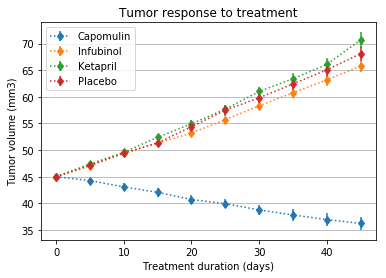

In [7]:
# Generate plot (with error bars)
plt.errorbar(pivot_avg_tumor_volume.index, pivot_avg_tumor_volume['Capomulin'], yerr=pivot_standard_error['Capomulin'], marker="d", linestyle="dotted")
plt.errorbar(pivot_avg_tumor_volume.index, pivot_avg_tumor_volume['Infubinol'], yerr=pivot_standard_error['Infubinol'], marker="d", linestyle="dotted")
plt.errorbar(pivot_avg_tumor_volume.index, pivot_avg_tumor_volume['Ketapril'], yerr=pivot_standard_error['Ketapril'], marker="d", linestyle="dotted")
plt.errorbar(pivot_avg_tumor_volume.index, pivot_avg_tumor_volume['Placebo'], yerr=pivot_standard_error['Placebo'], marker="d", linestyle="dotted")

plt.title('Tumor response to treatment')
plt.ylabel('Tumor volume (mm3)')
plt.xlabel('Treatment duration (days)')
plt.grid(axis='y')
plt.legend()

# Show and save figure
plt.savefig('TumorResponseToTreatment.png')
plt.show()

## Metastatic response to treatment

In [8]:
# Store mean metastatic site data grouped by drug and timepoint 
# Convert to dataframe
# Store the standard error associated with metastatic sites grouped by drug and timepoint 
# Convert to dataframe

metastatic_drug_timepoint = combined.groupby(['Drug', 'Timepoint'])
metastatic_avg_tumor_volume = metastatic_drug_timepoint['Metastatic Sites'].mean()
metastatic_standard_error = metastatic_drug_timepoint['Metastatic Sites'].sem()

reindexed_metastatic_avg_tumor_volume = metastatic_avg_tumor_volume.reset_index()
pivot_metastatic_avg_tumor_volume = reindexed_metastatic_avg_tumor_volume.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

reindexed_metastatic_standard_error = metastatic_standard_error.reset_index()
pivot_metastatic_standard_error = reindexed_metastatic_standard_error.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

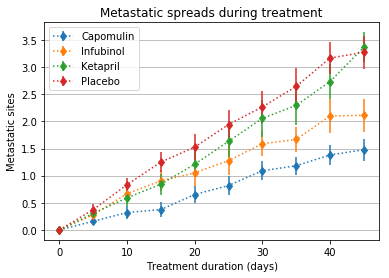

In [9]:
# Generate plot (with error bars)
plt.errorbar(pivot_metastatic_avg_tumor_volume.index, pivot_metastatic_avg_tumor_volume['Capomulin'], yerr=pivot_metastatic_standard_error['Capomulin'], marker="d", linestyle="dotted")
plt.errorbar(pivot_metastatic_avg_tumor_volume.index, pivot_metastatic_avg_tumor_volume['Infubinol'], yerr=pivot_metastatic_standard_error['Infubinol'], marker="d", linestyle="dotted")
plt.errorbar(pivot_metastatic_avg_tumor_volume.index, pivot_metastatic_avg_tumor_volume['Ketapril'], yerr=pivot_metastatic_standard_error['Ketapril'], marker="d", linestyle="dotted")
plt.errorbar(pivot_metastatic_avg_tumor_volume.index, pivot_metastatic_avg_tumor_volume['Placebo'], yerr=pivot_metastatic_standard_error['Placebo'], marker="d", linestyle="dotted")

plt.title('Metastatic spreads during treatment')
plt.ylabel('Metastatic sites')
plt.xlabel('Treatment duration (days)')
plt.grid(axis='y')
plt.legend()

# Show and save figure
plt.savefig('MetastaticSpreadDuringTreatment.png')
plt.show()

## Survival rates

In [10]:
# Store the count of mice grouped by drug and timepoint (w can pass any metric)
# Convert to data frame
survival_drug_timepoint = combined.groupby(['Drug', 'Timepoint']).count()['Tumor Volume (mm3)']
survival_drug_timepoint_df = pd.DataFrame({'Mouse count': survival_drug_timepoint})

In [11]:
# Munge to reformat data frames
reindexed_survival_drug_timepoint_df = survival_drug_timepoint_df.reset_index()
pivot_survival_drug_timepoint_df = reindexed_survival_drug_timepoint_df.pivot(index='Timepoint', columns='Drug')['Mouse count']

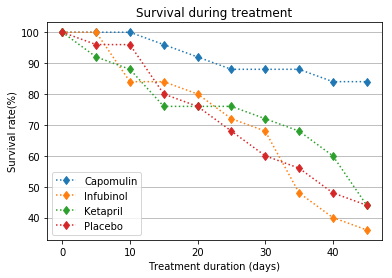

In [12]:
# Generate plot (with error bars)
# Multiplying by 4 to account for percentages
plt.errorbar(pivot_survival_drug_timepoint_df.index, pivot_survival_drug_timepoint_df['Capomulin'] * 4, marker="d", linestyle="dotted")
plt.errorbar(pivot_survival_drug_timepoint_df.index, pivot_survival_drug_timepoint_df['Infubinol'] * 4, marker="d", linestyle="dotted")
plt.errorbar(pivot_survival_drug_timepoint_df.index, pivot_survival_drug_timepoint_df['Ketapril'] * 4, marker="d", linestyle="dotted")
plt.errorbar(pivot_survival_drug_timepoint_df.index, pivot_survival_drug_timepoint_df['Placebo'] * 4, marker="d", linestyle="dotted")

plt.title('Survival during treatment')
plt.ylabel('Survival rate(%)')
plt.xlabel('Treatment duration (days)')
plt.grid(axis='y')
plt.legend()

# Show and save figure
plt.savefig('SurvivalDuringTreatment.png')
plt.show()

## Summary

In [13]:
# Calculate the percent changes (rounded to two decimal places) for each drug
percent_change_rounded = ((pivot_avg_tumor_volume.iloc[-1] - pivot_avg_tumor_volume.iloc[0]) / pivot_avg_tumor_volume.iloc[0] * 100).round(2)

In [14]:
# Store all relevant percent changes into a tuple
percent_change_subset = (
    percent_change_rounded['Capomulin'],
    percent_change_rounded['Infubinol'],
    percent_change_rounded['Ketapril'],
    percent_change_rounded['Placebo'])

# Create variable for x-axis
x = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')

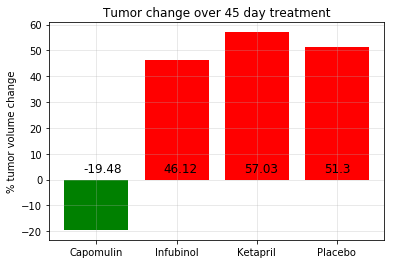

In [15]:
# Indicate tumor growth as red and tumor reduction as green
colors_list = []
for value in percent_change_subset:
    if value > 0: colors_list.append('r')
    else: colors_list.append('g')
        
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
fig, ax = plt.subplots()
ax.bar(x, percent_change_subset, color=colors_list)


# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor change over 45 day treatment')
plt.ylabel('% tumor volume change')
plt.grid(linestyle='solid', alpha=0.35) 

# Include a label with the percentage change for each bar  
# Use functions to label the percentages of changes

for i, v in enumerate(percent_change_subset):
    ax.text(i-.16, i/percent_change_subset[i]+3, percent_change_subset[i], fontsize=12, color="k")

In [16]:
# PNG exports not working
# Show and save the figure
plt.savefig("PercentChange.png")
plt.show()

<Figure size 432x288 with 0 Axes>